In [41]:
import importlib
import ORHSProject as proj

import copy
from mantid.simpleapi import *
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski

In [71]:
importlib.reload(proj)
imbox = proj.imageToolbox

In [43]:
inputDataPath = "/SNS/SNAP/shared/temp/ORHSData2.nxs"
neutronData = LoadNexusProcessed(Filename=inputDataPath)
neutronData = ConvertUnits(InputWorkspace = neutronData, Target = "dSpacing")

LoadNexusProcessed-[Notice] LoadNexusProcessed started
ISISRunLogs-[Warning] Cannot find period log. Logs will be not be filtered by current period
ISISRunLogs-[Warning] Cannot find periods log. Logs will be not be filtered by current period
LoadNexusProcessed-[Notice] LoadNexusProcessed successful, Duration 5.54 seconds
ConvertUnits-[Notice] ConvertUnits started
ConvertUnits-[Notice] ConvertUnits successful, Duration 0.05 seconds


In [72]:
#determined limiting d values
ws = mtd["neutronData"]
x = ws.readX(0)
print(x)
xmin = np.min(x)
xmax = np.max(x)
print(xmin)
print(xmax)
slice_amount = 5
slice_width = (xmax-xmin)/(slice_amount)
print(slice_width)

[0.16853428 0.16870281 0.16887152 ... 2.35623562 2.35859185 2.35947991]
0.1685342795489059
2.359479913684683
0.4381891268271554


Rebin-[Notice] Rebin started
Rebin-[Notice] Rebin successful, Duration 1.41 seconds
zMax 5.069542628712952
zMin 0.0006455783877754584
norm is 5.069542628712952
The dimensions of the self.mask array are (96, 192) and its type is bool
The dimensions of the self.image array are (96, 192) and its type is float64
There are 0 masked pixels out of 18432 pixels, or 0.0%.
imbox initialized
Rebin-[Notice] Rebin started
Rebin-[Notice] Rebin successful, Duration 0.10 seconds
zMax 8.020308572650446
zMin 0.020646552101113873
norm is 8.020308572650446
The dimensions of the self.mask array are (96, 192) and its type is bool
The dimensions of the self.image array are (96, 192) and its type is float64
There are 0 masked pixels out of 18432 pixels, or 0.0%.
imbox initialized
Rebin-[Notice] Rebin started
Rebin-[Notice] Rebin successful, Duration 0.05 seconds
zMax 0.08908121023691375
zMin 0.011067058076150715
norm is 0.08908121023691375
The dimensions of the self.mask array are (96, 192) and its type is bo

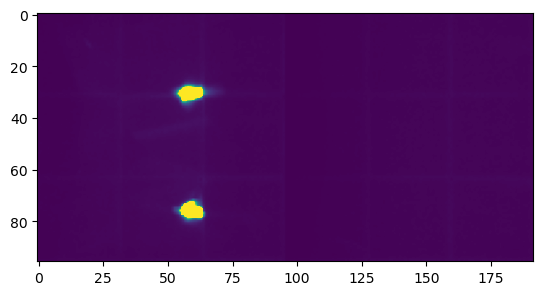

In [73]:
slice_list = []
for i in range(slice_amount):
    slice_min = xmin+i*slice_width
    slice_max = slice_min+slice_width
    slice1 = imbox('neutronData', slice_min, slice_max)
    #slice1.applyMask()
    #slice1.imageFactory
    #slice1.image = slice1.maskedImage
    slice_list.append(slice1.image)
plt.imshow(slice1.image, vmax= .02)

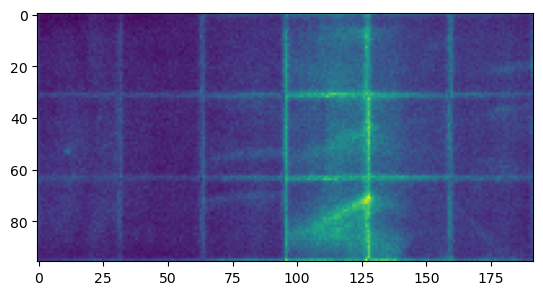

In [17]:
plt.imshow(slice_list[5])

In [46]:
import matplotlib.pyplot as plt
from matplotlib import animation

def list2Movie(imageList,savePath=None, vMax=1):
    """Render a list of 2D arrays as an animation in a Jupyter notebook."""
    plt.close('all')
    
    stack = np.stack(imageList, axis=0)
    
    fig, ax = plt.subplots()
    im = ax.imshow(stack[0], vmin=0, vmax=vMax, animated=True)
    ax.axis('off')

    def update(frame):
        im.set_array(stack[frame])
        return [im]  # <- return here, inside the update function

    ani = animation.FuncAnimation(
        fig, update, frames=len(stack), interval=100, blit=True
    )
    
    plt.show()

    if savePath:
        fps = 10
        writer = animation.FFMpegWriter(fps=fps, bitrate=1800)
        ani.save(savePath, writer=writer)
        print(f"Saved animation to {savePath}")
    
    return ani

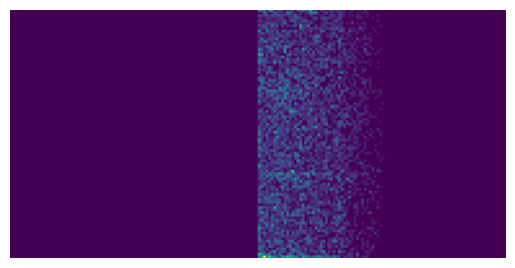

In [50]:
list2Movie(slice_list) #'test.mp4')

Rebin-[Notice] Rebin started
Rebin-[Notice] Rebin successful, Duration 0.08 seconds
zMax 0.025355041769732203
zMin 0.0003689019358716905
The dimensions of the self.mask array are (96, 192) and its type is bool
The dimensions of the self.image array are (96, 192) and its type is float64
There are 0 masked pixels out of 18432 pixels, or 0.0%.
imbox initialized


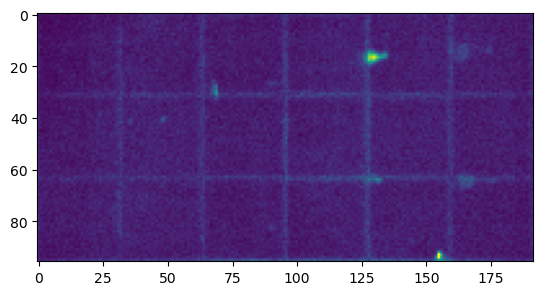

In [4]:
slice1 = imbox('neutronData', 1.22, 1.27)
#slice1.applyMask()
#slice1.imageFactory
slice1.image = slice1.maskedImage
plt.imshow(slice1.image, vmax= .02)

In [65]:
print(slice1.mask)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [6]:
print(slice1.darkMask)

slice1.darkMask()

<bound method imageToolbox.darkMask of <ORHSProject.imageToolbox object at 0x7f18f1c07410>>
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [74]:
print(slice1.gridMask)

slice1.gridMask()
slice1.applyMask()

<bound method imageToolbox.gridMask of <ORHSProject.imageToolbox object at 0x7f9c97337e90>>
The dimensions of the self.mask array are (96, 192) and its type is bool
The dimensions of the self.image array are (96, 192) and its type is float64
There are 3294 masked pixels out of 18432 pixels, or 17.87109375%.


In [85]:
slice1.threshMask(0.1)
slice1.applyMask()

The dimensions of the self.mask array are (96, 192) and its type is bool
The dimensions of the self.image array are (96, 192) and its type is float64
There are 45 masked pixels out of 18432 pixels, or 0.244140625%.


In [ ]:
#print(np.count_nonzero[slice1.darkmask()])

In [87]:
slice1.eraseMask()

In [59]:
slice1.darkMask()
slice1.threshMask(1)
slice1.applyMask()

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
The dimensions of the self.mask array are (96, 192) and its type is bool
The dimensions of the self.image array are (96, 192) and its type is float64
There are 18431 masked pixels out of 18432 pixels, or 99.99457465277779%.


In [89]:
slice1.gridMask()
slice1.threshMask(0.1)
slice1.applyMask()

The dimensions of the self.mask array are (96, 192) and its type is bool
The dimensions of the self.image array are (96, 192) and its type is float64
There are 3324 masked pixels out of 18432 pixels, or 18.033854166666664%.


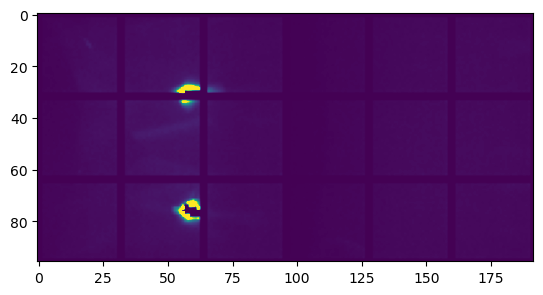

In [90]:
plt.imshow(slice1.maskedImage, vmax=0.01)

Rebin-[Notice] Rebin started
Rebin-[Notice] Rebin successful, Duration 0.09 seconds
zMax 53.77036158018179
zMin 0.0266001750276947
imbox initialized


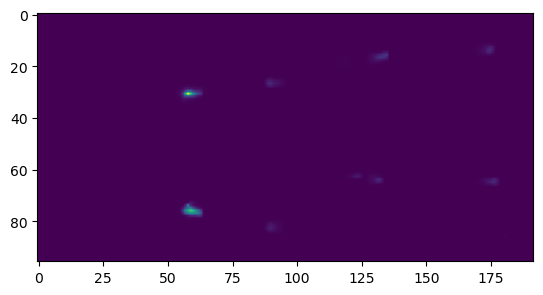

In [116]:
imbox = proj.imageToolbox
slice2 = proj.imageToolbox('neutronData', 1, 2.5)
#slice1.imageFactory
plt.imshow(slice2.image)

In [ ]:
#work on/try putting the plot function into the VS code and check vmax against zmax and zmin in that terminal/code space